In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

np.random.seed(42)
random.seed(42)

In [9]:
# for i in tqdm(range(5)):
#     print(i)

100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 2015.72it/s]

0
1
2
3
4


In [16]:

data = pd.read_csv('Project_1_dataset_01_01_2022.csv')

# Question 1

  0%|                                                                                         | 0/2072 [00:08<?, ?it/s]


(array([203., 138., 206., 209., 195., 212., 174., 154.,  97.,  70.,  57.,
         53.,  71.,  42.,  40.,  28.,  21.,  23.,  14.,   9.,   8.,   3.,
          1.,   4.,   4.,   3.,   3.,   5.,   1.,   1.,   1.,   3.,   3.,
          0.,   2.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   2.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.]),
 array([   43.  ,   374.62,   706.24,  1037.86,  1369.48,  1701.1 ,
         2032.72,  2364.34,  2695.96,  3027.58,  3359.2 ,  3690.82,
         4022.44,  4354.06,  4685.68,  5017.3 ,  5348.92,  5680.54,
         6012.16,  6343.78,  6675.4 ,  7007.02,  7338.64,  7670.26,
         8001.88,  8333.5 ,  8665.12,  8996.74

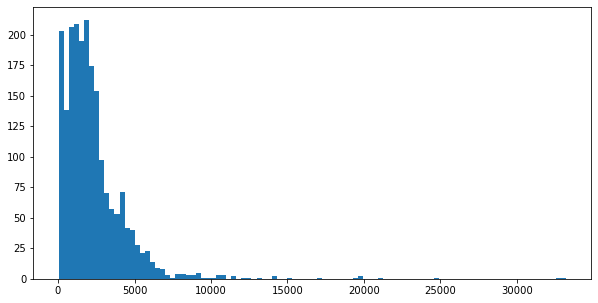

In [17]:
full_text = data['full_text']
lst = []
for s in full_text:
    numbers = sum(c.isdigit() for c in s)
    letters = sum(c.isalpha() for c in s)
    len_ = numbers + letters
    lst.append(len_)

plt.figure(figsize=(10,5))
plt.hist(lst, 100)

<AxesSubplot:>

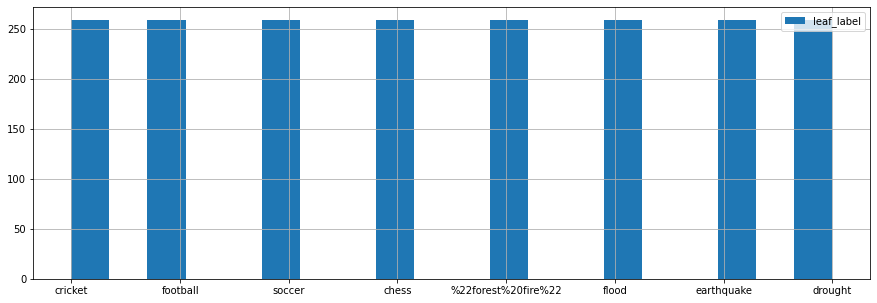

In [18]:
data['leaf_label'].hist(bins=20, figsize=(15,5), legend = True)

In [5]:
data['leaf_label'].value_counts()

cricket                259
football               259
soccer                 259
chess                  259
%22forest%20fire%22    259
flood                  259
earthquake             259
drought                259
Name: leaf_label, dtype: int64

<AxesSubplot:>

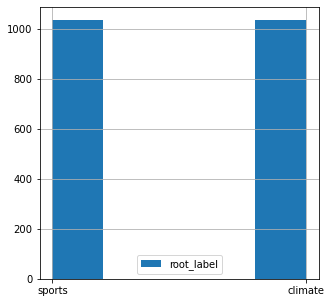

In [6]:
data['root_label'].hist(bins=5, figsize=(5,5), legend = True)

In [7]:
data['root_label'].value_counts()

sports     1036
climate    1036
Name: root_label, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2072 non-null   int64 
 1   full_text     2072 non-null   object
 2   summary       2072 non-null   object
 3   keywords      2072 non-null   object
 4   publish_date  1125 non-null   object
 5   authors       2072 non-null   object
 6   url           2072 non-null   object
 7   leaf_label    2072 non-null   object
 8   root_label    2072 non-null   object
dtypes: int64(1), object(8)
memory usage: 145.8+ KB


1(a): Overview: How many rows (samples) and columns (features) are present in the dataset? 

We got 2072 rows and 9 columns from the raw data.

1(c): Interpret Plots: Provide qualitative interpretations of the histograms.

plot1: The total number of alpha-numeric characters per data (full_text) is distributed around 0-5000. The frequency for count around 0-2500 can be around 200.
plot2: The number of each 8 category in the column 'leaf_label' of this data is all equal to 259, the names of category are shown in the plot.
plot3: The number of each 2 category in the column 'root_label' of this data is all equal to 1036, the names of category are shown in the plot.


# Quetion 2

In [20]:
import re
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter
    
data['full_text'] = data['full_text'].map(lambda text: clean(text))

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

train, test = train_test_split(data[["full_text","root_label"]], test_size = 0.2, random_state = 42)
print("train shape:", train.shape)
print("test shape:", test.shape)

train shape: (1657, 2)
test shape: (415, 2)


2: Report the number of training and testing samples.

Train size: (1657, 2)
Test size: (415, 2)

# Question 3

In [22]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from string import punctuation

In [23]:
wnl = nltk.wordnet.WordNetLemmatizer()

def penn2morphy(penntag): 
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if not word.isdigit())

vectorizer = CountVectorizer(stop_words = 'english',min_df = 3, analyzer = stem_rmv_punc)

# fit_tranform train data
train_counts = vectorizer.fit_transform(train['full_text'])
print("train count size ", train_counts.shape)

test_counts = vectorizer.transform(test['full_text'])
print("test count size ", test_counts.shape)


train count size  (1657, 10429)
test count size  (415, 10429)


3(a): What are the pros and cons of lemmatization versus stemming? How do these processes affect
the dictionary size?

Stemming just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling. 
Lemmatization converts the word to its meaningful base form, which is called Lemma. Sometimes, the same word can have multiple different Lemmas. We should identify the Part of Speech (POS) tag for the word in that specific context.
If you lemmatize the word 'Caring', it would return 'Care'. If you stem, it would return 'Car' and this is erroneous.
If you lemmatize the word 'Stripes' in verb context, it would return 'Strip'. If you lemmatize it in noun context, it would return 'Stripe'. If you just stem it, it would just return 'Strip'.

Pros: Lemmatization mostly comes out with a better result than stemming, due to its performing algorithm. 
Cons: It requires a more complicated process to implement and may run slower(requires more time).

They both decrease the size of dictionary.


3(b):min df means minimum document frequency. How does varying min df change the TF-IDF
matrix?

TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.min_df is used for removing terms that appear too infrequently. It is used to calculate the minimum number of documents that a word must be found in. Therefore, min_df = 3 means that it removes all words that have a count of less than 3. Decreasing the value may increase the bag-of-words matrix and result in inaccurate searching.

3(c):Should I remove stopwords before or after lemmatizing? Should I remove punctuations before
or after lemmatizing? Should I remove numbers before or after lemmatizing?

In general cases,punctuations and numbers should be remove first. And then we should quantitatively test to see if lemmatizing or stopword removal helps and decide the sequence. Generally, removing punctuations, numbers, stopwords, and finally lemmatization would be the better sequence.
Lemmatizing at the end would deal with fewer words, skip unnecessary process and save time.


3(d):Report the shape of the TF-IDF-processed train and test matrices. The number of rows should
match the results of Question 2. The number of columns should roughly be in the order of
k×103. This dimension will vary depending on your exact method of cleaning and lemmatizing
and that is okay.

1657 and 415, which match the result from Question 2.10429 is the TF-IDF size and it is quite reasonable.

# Question 4

In [13]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_counts)
test_tfidf = tfidf_transformer.transform(test_counts)

In [14]:
# k = [1, 10, 50, 100, 200, 500, 1000, 2000]
list_k = []

svd_1 = TruncatedSVD(n_components=1, random_state=42)
train_reduced_1 = svd_1.fit_transform(train_tfidf)

svd_10 = TruncatedSVD(n_components=10, random_state=42)
train_reduced_1 = svd_10.fit_transform(train_tfidf)

svd_50 = TruncatedSVD(n_components=50, random_state=42)
train_reduced_50 = svd_50.fit_transform(train_tfidf)

svd_100 = TruncatedSVD(n_components=100, random_state=42)
train_reduced_100 = svd_100.fit_transform(train_tfidf)

svd_200 = TruncatedSVD(n_components=200, random_state=42)
train_reduced_200 = svd_200.fit_transform(train_tfidf)

svd_500 = TruncatedSVD(n_components=500, random_state=42)
train_reduced_500 = svd_500.fit_transform(train_tfidf)

svd_1000 = TruncatedSVD(n_components=1000, random_state=42)
train_reduced_1000 = svd_1000.fit_transform(train_tfidf)

svd_2000 = TruncatedSVD(n_components=2000, random_state=42)
train_reduced_2000 = svd_2000.fit_transform(train_tfidf)

list_k.append(svd_1.explained_variance_ratio_.sum())
list_k.append(svd_10.explained_variance_ratio_.sum())
list_k.append(svd_50.explained_variance_ratio_.sum())
list_k.append(svd_100.explained_variance_ratio_.sum())
list_k.append(svd_200.explained_variance_ratio_.sum())
list_k.append(svd_500.explained_variance_ratio_.sum())
list_k.append(svd_1000.explained_variance_ratio_.sum())
list_k.append(svd_2000.explained_variance_ratio_.sum())

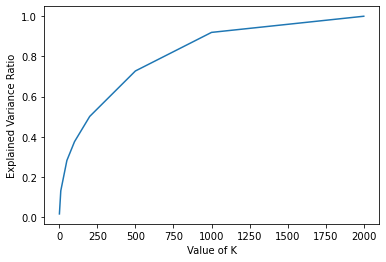

In [15]:
test_reduced_50 = svd_50.transform(test_tfidf)
plt.plot([1, 10, 50, 100, 200, 500, 1000, 2000], list_k)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Value of K')
plt.show()

In [16]:
print(train_reduced_50.shape)
train_LSI=svd_50.inverse_transform(train_reduced_50)
print( 'Error for LSI:', np.sum(np.array(train_tfidf - train_LSI)**2))


(1657, 50)
Error for LSI: 1024.6322753720335


In [17]:
from sklearn.decomposition import NMF

model_NMF = NMF(n_components=50, init='random', random_state=42, max_iter = 500)
W_train = model_NMF.fit_transform(train_tfidf)
print(W_train.shape)

H = model_NMF.components_
print('Error for NMF:', np.sum(np.array(train_tfidf - W_train.dot(H))**2))

(1657, 50)
Error for NMF: 1047.4252783833997


4(a): Plot the explained variance ratio across multiple different k = [1, 10, 50, 100, 200, 500, 1000, 2000]
for LSI and for the next few sections choose k = 50. What does the explained variance ratio
plot look like? What does the plot’s concavity suggest?

It is concave down.The explained variance ratio is the percentage of variance that is attributed by each of the selected components. It shows the cumlative sum of variance explained as we add principal components. We can reduce the number of variables while still retaining over 80% of the ratio of the data in order to reduce overfitting.

4(b): With k = 50 found in the previous sections, calculate the reconstruction residual MSE error
when using LSI and NMF – they both should use the same k = 50. Which one is larger and why? 

LSI: 1024.6322753720335
NMF: 1047.4252783833997
NMF has larger error. This is because NMF only allows positive terms in the rank-reducing eigenmatrix, while LSI has no such limitation. As a result, LSI can better represent high-dimensional eigen-matrices, providing deeper factorization and causing lower loss.


# Question 5

In [18]:
# categories = ['sports', 'climate']

train["root_label"] = train["root_label"].astype('category')
train["target"] = train["root_label"].cat.codes
train["root_label"] = train["root_label"].astype('object')

test["root_label"] = test["root_label"].astype('category')
test["target"] = test["root_label"].cat.codes
test["root_label"] = test["root_label"].astype('object')

In [19]:
from sklearn.svm import SVC, LinearSVC
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

def plot_confusion_matrix_(y_test, pred):
    
    print('accuracy:', accuracy_score(y_test, pred))
    print('recall:', recall_score(y_test, pred))
    print('precision:', precision_score(y_test, pred))
    print('f1_score:', f1_score(y_test, pred))
    
    print('\n')
    # confusion matrix
    matrix = confusion_matrix(y_test, pred, labels=[1,0])

    print('Confusion matrix : \n',matrix)

    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(y_test,pred,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    matrix = classification_report(y_test,pred,labels=[1,0])
    print('Classification report : \n',matrix)

    cm = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(cm, index = [i for i in "AB"],
                      columns = [i for i in "AB"])
    plt.figure(figsize = (10,7))
    heatmap2 = sns.heatmap(df_cm, annot=True)
    plt.yticks(rotation = 0)
    plt.show()

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    
    if hasattr(pipe, 'decision_function'):
        prob_score = pipe.decision_function(test_data)
        fpr, tpr, thresholds = roc_curve(test_label, prob_score)
    else:
        prob_score = pipe.predict_proba(test_data)
        fpr, tpr, thresholds = roc_curve(test_label, prob_score[:,1])
    plot_roc(fpr, tpr)


In [20]:
Hard_SVM = SVC(kernel='linear',C=1000,random_state=42)
Soft_SVM = SVC(kernel='linear',C=0.0001,random_state=42)
SVM_100000 = SVC(kernel='linear',C=100000,random_state=42)

pipeline1 = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', Hard_SVM),
])

pipeline2 = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', Soft_SVM),
])

pipeline3 = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', SVM_100000),
])


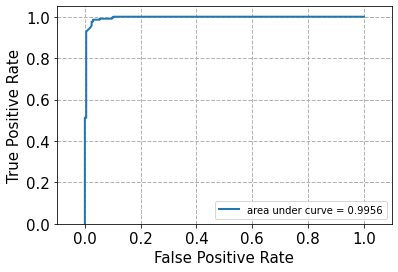

In [21]:
fit_predict_and_plot_roc(pipeline1, train['full_text'], train['target'], test['full_text'], test['target'])

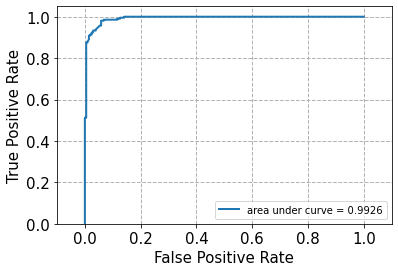

In [22]:
fit_predict_and_plot_roc(pipeline2, train['full_text'], train['target'], test['full_text'], test['target'])

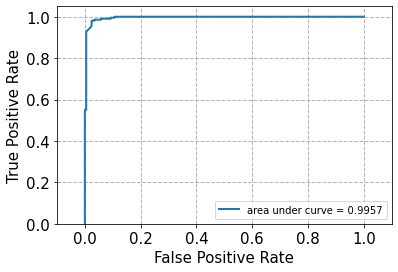

In [23]:
fit_predict_and_plot_roc(pipeline3, train['full_text'], train['target'], test['full_text'], test['target'])

In [24]:
pred1 = pipeline1.predict(test['full_text'])

In [25]:
pred2 = pipeline2.predict(test['full_text'])

In [26]:
pred3 = pipeline3.predict(test['full_text'])

accuracy: 0.9759036144578314
recall: 0.9856459330143541
precision: 0.9671361502347418
f1_score: 0.976303317535545


Confusion matrix : 
 [[206   3]
 [  7 199]]
Outcome values : 
 206 3 7 199
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.99      0.98       209
           0       0.99      0.97      0.98       206

    accuracy                           0.98       415
   macro avg       0.98      0.98      0.98       415
weighted avg       0.98      0.98      0.98       415



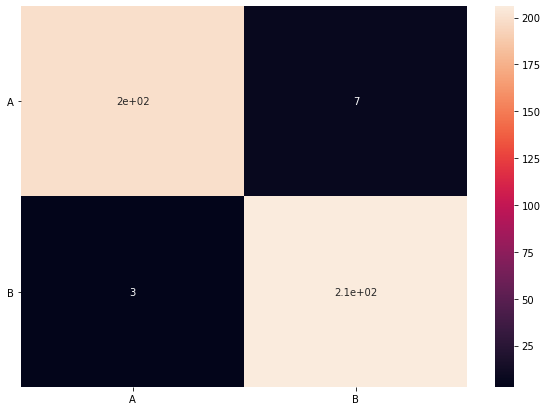

In [27]:
plot_confusion_matrix_(test['target'], pred1)

accuracy: 0.4963855421686747
recall: 0.0
precision: 0.0
f1_score: 0.0


Confusion matrix : 
 [[  0 209]
 [  0 206]]
Outcome values : 
 0 209 0 206
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       209
           0       0.50      1.00      0.66       206

    accuracy                           0.50       415
   macro avg       0.25      0.50      0.33       415
weighted avg       0.25      0.50      0.33       415



C:\Users\ericz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ericz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


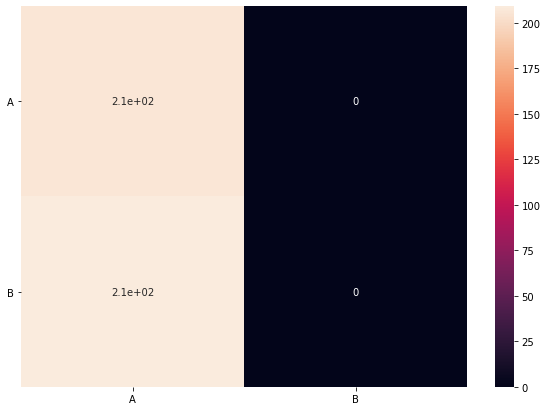

In [28]:
plot_confusion_matrix_(test['target'], pred2)

accuracy: 0.9759036144578314
recall: 0.9808612440191388
precision: 0.9715639810426541
f1_score: 0.9761904761904763


Confusion matrix : 
 [[205   4]
 [  6 200]]
Outcome values : 
 205 4 6 200
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.98      0.98       209
           0       0.98      0.97      0.98       206

    accuracy                           0.98       415
   macro avg       0.98      0.98      0.98       415
weighted avg       0.98      0.98      0.98       415



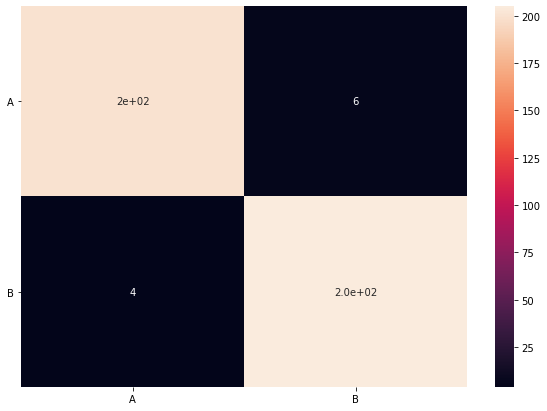

In [29]:
plot_confusion_matrix_(test['target'], pred3)

5(a): Compare and contrast hard-margin and soft-margin linear SVMs:
Train two linear SVMs:
– Train one SVM with γ = 1000 (hard margin), another with γ = 0.0001 (soft margin).
– Plot the ROC curve, report the confusion matrix and calculate the accuracy, recall,
precision and F-1 score of both SVM classifiers on the testing set. Which one performs
better? What about for γ = 100000?

All the results are shown above for γ = 1000, 0.0001 and 100000, using Hard_SVM, Soft_SVM and SVM_100000 respectively. I use self-written confusion matrix function, which I discard for further tasks since I found out that built-in confusion matrix function are more elegant.   
Hard_SWM and SVM_100000 share the same higher accuracy while Soft_SVM occurs error, as shown in the matrix. 


– What happens for the soft margin SVM? Why is the case? Analyze in terms of the
confusion matrix.
∗ Does the ROC curve of the soft margin SVM look competitive? Please explain.

When a linear boundary is not feasible, or we want to allow some misclassifications while training model, we can choose soft margin for our classifier.In this case γ = 0.0001, which allows SVM classifier to make a huge misclassification by making a wider margin such that other samples can still be classified when the data are linearly inseparable. When y is small, the hinge loss is given less importance and misclassification is not penalized as harshly as when y is large. For the statistic,
accuracy: 0.4963855421686747
recall: 0.0
precision: 0.0
f1_score: 0.0
Confusion matrix : 
 [[  0 209]
 [  0 206]]
Theoretically, F1 can not be zero, but very near to zero for a worse classifier. If TP or TN is zero then there isn't any need to check F1.

ROC curve looks competitive. It shows the ROC curve plot for TP rate vs FP rate, and thus TPR will immediately get close to 1 as FPR increase.



In [30]:
from sklearn.model_selection import GridSearchCV

clf_cv = SVC(random_state=42)
param_grid = {'C': [0.001,0.01,0.1,1,10,100,300, 500, 600, 700, 750, 1000],  
              'kernel': ['linear']}
grid = GridSearchCV(clf_cv,param_grid,cv=5,scoring='accuracy')
grid.fit(train_reduced_50,train['target'])
pred_cv = grid.best_estimator_.predict(test_reduced_50)

best_Gamma = grid.best_params_['C']
print('Best Value of gamma:',best_Gamma) 
for value, accuracy in zip(param_grid['C'],grid.cv_results_['mean_test_score']):
    print(f'Gamma: {value}\t',f'Avg. Validation Accuracy: {accuracy}')

Best Value of gamma: 500
Gamma: 0.001	 Avg. Validation Accuracy: 0.5009063444108761
Gamma: 0.01	 Avg. Validation Accuracy: 0.5009063444108761
Gamma: 0.1	 Avg. Validation Accuracy: 0.9366268700178356
Gamma: 1	 Avg. Validation Accuracy: 0.9432679357915044
Gamma: 10	 Avg. Validation Accuracy: 0.9468823936228297
Gamma: 100	 Avg. Validation Accuracy: 0.9571360972591272
Gamma: 300	 Avg. Validation Accuracy: 0.9565355075892695
Gamma: 500	 Avg. Validation Accuracy: 0.9589542459869691
Gamma: 600	 Avg. Validation Accuracy: 0.9577494267098606
Gamma: 700	 Avg. Validation Accuracy: 0.9541295089724455
Gamma: 750	 Avg. Validation Accuracy: 0.9553361482182506
Gamma: 1000	 Avg. Validation Accuracy: 0.9541240490663562


In [31]:
SVM_best_Gamma = SVC(kernel='linear',C=best_Gamma,random_state=42)

pipeline_SVM_best_Gamma = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', SVM_best_Gamma),
])


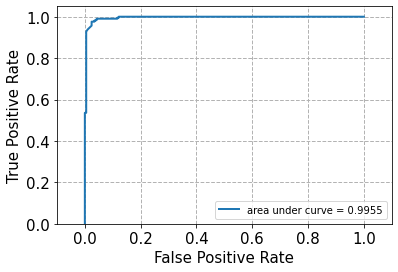

In [32]:
fit_predict_and_plot_roc(pipeline_SVM_best_Gamma, train['full_text'], train['target'], test['full_text'], test['target'])

In [33]:
pred_best_Gamma = pipeline_SVM_best_Gamma.predict(test['full_text'])

accuracy: 0.9710843373493976
recall: 0.9808612440191388
precision: 0.9624413145539906
f1_score: 0.9715639810426541


Confusion matrix : 
 [[205   4]
 [  8 198]]
Outcome values : 
 205 4 8 198
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97       209
           0       0.98      0.96      0.97       206

    accuracy                           0.97       415
   macro avg       0.97      0.97      0.97       415
weighted avg       0.97      0.97      0.97       415



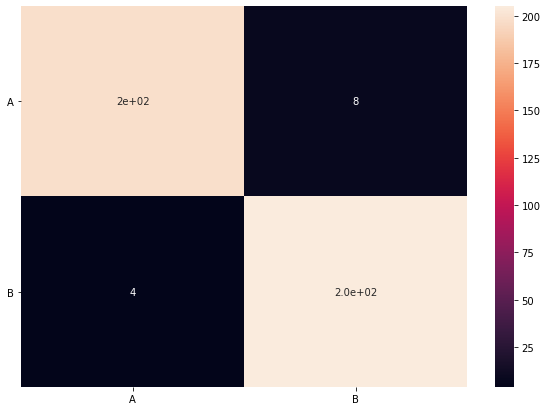

In [34]:
plot_confusion_matrix_(test['target'], pred_best_Gamma)

5(b): Use cross-validation to choose γ (use average validation 3 accuracy to compare): Using a
5-fold cross-validation, find the best value of the parameter γ in the range {10k| − 3 ≤ k ≤
6, k ∈ Z}. Again, plot the ROC curve and report the confusion matrix and calculate the
accuracy, recall precision and F-1 score of this best SVM.

Best Value of gamma: 500. And the ROC curve, confusion matrix and four values are shown above.





# Question 6

Without regularization

In [35]:
from sklearn.linear_model import LogisticRegression

# Logistic regression without regularization
pipeline_LR = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', LogisticRegression(C=10**10, solver = 'liblinear' )),
])

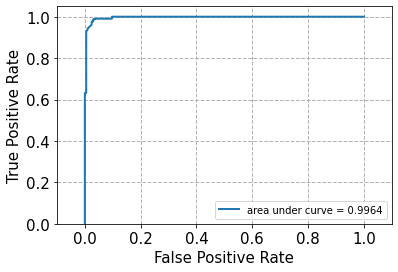

In [36]:
fit_predict_and_plot_roc(pipeline_LR, train['full_text'], train['target'], test['full_text'], test['target'])

In [37]:
pred_LR = pipeline_LR.predict(test['full_text'])

accuracy: 0.9783132530120482
recall: 0.9856459330143541
precision: 0.9716981132075472
f1_score: 0.9786223277909739


Confusion matrix : 
 [[206   3]
 [  6 200]]
Outcome values : 
 206 3 6 200
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.99      0.98       209
           0       0.99      0.97      0.98       206

    accuracy                           0.98       415
   macro avg       0.98      0.98      0.98       415
weighted avg       0.98      0.98      0.98       415



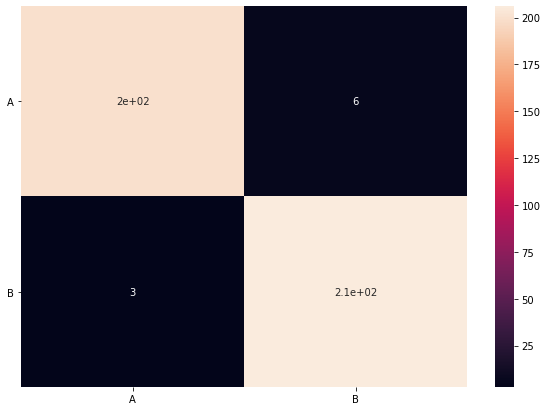

In [38]:
plot_confusion_matrix_(test['target'], pred_LR)

L1

In [39]:
clf_LR_L1 = LogisticRegression(penalty='l1',random_state=42,solver='liblinear', max_iter=100000)
param_grid = {'C': [0.0001, 0.001, 0.01,0.1,1,10,50,75,100,150,200, 300, 600, 750,1000, 10000]}
grid = GridSearchCV(clf_LR_L1,param_grid,cv=5,scoring='accuracy')
grid.fit(train_reduced_50,train['target'])
pred_LR_L1 = grid.best_estimator_.predict(test_reduced_50)

best_Gamma_L1 = grid.best_params_['C']
print('Best Value of gamma:',best_Gamma_L1) 
for value, accuracy in zip(param_grid['C'],grid.cv_results_['mean_test_score']):
    print(f'Gamma: {value}\t',f'Avg. Validation Accuracy: {accuracy}')

Best Value of gamma: 75
Gamma: 0.0001	 Avg. Validation Accuracy: 0.5009063444108761
Gamma: 0.001	 Avg. Validation Accuracy: 0.5009063444108761
Gamma: 0.01	 Avg. Validation Accuracy: 0.5009063444108761
Gamma: 0.1	 Avg. Validation Accuracy: 0.9052396898773342
Gamma: 1	 Avg. Validation Accuracy: 0.9456739344083281
Gamma: 10	 Avg. Validation Accuracy: 0.9529137698831581
Gamma: 50	 Avg. Validation Accuracy: 0.9571415571652168
Gamma: 75	 Avg. Validation Accuracy: 0.9577476067411641
Gamma: 100	 Avg. Validation Accuracy: 0.9571451971026098
Gamma: 150	 Avg. Validation Accuracy: 0.9571451971026098
Gamma: 200	 Avg. Validation Accuracy: 0.9571451971026098
Gamma: 300	 Avg. Validation Accuracy: 0.9571451971026098
Gamma: 600	 Avg. Validation Accuracy: 0.9571451971026098
Gamma: 750	 Avg. Validation Accuracy: 0.9571451971026098
Gamma: 1000	 Avg. Validation Accuracy: 0.9571451971026098
Gamma: 10000	 Avg. Validation Accuracy: 0.9571451971026098


In [40]:
clf_best_L1 = LogisticRegression(penalty='l1', C=best_Gamma_L1, random_state=42, solver='liblinear')

pipeline_L1 = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', clf_best_L1),
])


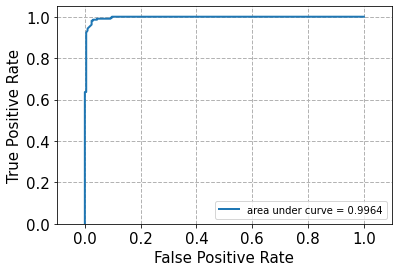

In [41]:
fit_predict_and_plot_roc(pipeline_L1, train['full_text'], train['target'], test['full_text'], test['target'])

In [42]:
pred_best_L1 = pipeline_L1.predict(test['full_text'])

accuracy: 0.9783132530120482
recall: 0.9856459330143541
precision: 0.9716981132075472
f1_score: 0.9786223277909739


Confusion matrix : 
 [[206   3]
 [  6 200]]
Outcome values : 
 206 3 6 200
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.99      0.98       209
           0       0.99      0.97      0.98       206

    accuracy                           0.98       415
   macro avg       0.98      0.98      0.98       415
weighted avg       0.98      0.98      0.98       415



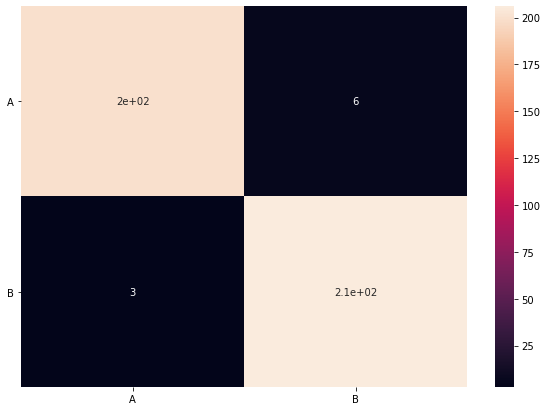

In [43]:
plot_confusion_matrix_(test['target'], pred_best_L1)

L2

In [44]:
clf_LR_L2 = LogisticRegression(penalty='l2',random_state=42,solver='liblinear', max_iter=100000)
param_grid = {'C': [0.0001, 0.001, 0.01,0.1,1,10, 100,750,1000,2000, 3000, 5000, 7500, 10000]}
grid = GridSearchCV(clf_LR_L2,param_grid,cv=5,scoring='accuracy')
grid.fit(train_reduced_50,train['target'])
pred_LR_L2 = grid.best_estimator_.predict(test_reduced_50)

best_Gamma_L2 = grid.best_params_['C']
print('Best Value of gamma:',best_Gamma_L2) 
for value, accuracy in zip(param_grid['C'],grid.cv_results_['mean_test_score']):
    print(f'Gamma: {value}\t',f'Avg. Validation Accuracy: {accuracy}')

Best Value of gamma: 1000
Gamma: 0.0001	 Avg. Validation Accuracy: 0.898005314308594
Gamma: 0.001	 Avg. Validation Accuracy: 0.9185272813307612
Gamma: 0.01	 Avg. Validation Accuracy: 0.9390365085720525
Gamma: 0.1	 Avg. Validation Accuracy: 0.9384304589961052
Gamma: 1	 Avg. Validation Accuracy: 0.9432606559167184
Gamma: 10	 Avg. Validation Accuracy: 0.9499035416590835
Gamma: 100	 Avg. Validation Accuracy: 0.9547282786736069
Gamma: 750	 Avg. Validation Accuracy: 0.9577457867724675
Gamma: 1000	 Avg. Validation Accuracy: 0.9589524260182725
Gamma: 2000	 Avg. Validation Accuracy: 0.9583500163797183
Gamma: 3000	 Avg. Validation Accuracy: 0.9583500163797183
Gamma: 5000	 Avg. Validation Accuracy: 0.9571451971026098
Gamma: 7500	 Avg. Validation Accuracy: 0.9571451971026098
Gamma: 10000	 Avg. Validation Accuracy: 0.9571451971026098


In [45]:
clf_best_L2 = LogisticRegression(penalty='l2', C=best_Gamma_L2, random_state=42, solver='liblinear')

pipeline_L2 = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', clf_best_L2),
])

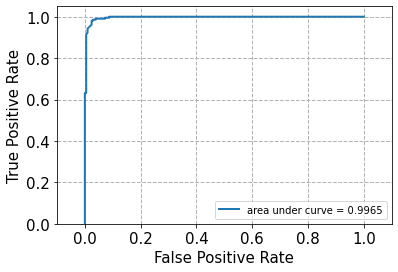

In [46]:
fit_predict_and_plot_roc(pipeline_L2, train['full_text'], train['target'], test['full_text'], test['target'])

In [47]:
pred_best_L2 = pipeline_L2.predict(test['full_text'])

accuracy: 0.9759036144578314
recall: 0.9856459330143541
precision: 0.9671361502347418
f1_score: 0.976303317535545


Confusion matrix : 
 [[206   3]
 [  7 199]]
Outcome values : 
 206 3 7 199
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.99      0.98       209
           0       0.99      0.97      0.98       206

    accuracy                           0.98       415
   macro avg       0.98      0.98      0.98       415
weighted avg       0.98      0.98      0.98       415



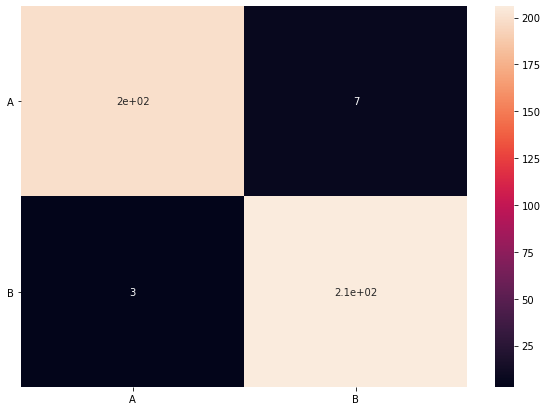

In [48]:
plot_confusion_matrix_(test['target'], pred_best_L2)

6(b): Using 5-fold cross-validation on the dimension-reduced-by-SVD training data, find the optimal
regularization strength in the range {10k|−4 ≤ k ≤ 4, k ∈ Z} for logistic regression
with L1 regularization and logistic regression with L2 regularization, respectively.

L1: Best Value of gamma is 75
L2: Best Value of gamma is 1000

– Compare the performance (accuracy, precision, recall and F-1 score) of 3 logistic classifiers:
w/o regularization, w/ L1 regularization and w/ L2 regularization (with the best
parameters you found from the part above), using test data.

accuracy: 0.9783132530120482
recall: 0.9856459330143541
precision: 0.9716981132075472
f1_score: 0.9786223277909739
Confusion matrix : 
 [[206   3]
 [  6 200]]

accuracy: 0.9783132530120482
recall: 0.9856459330143541
precision: 0.9716981132075472
f1_score: 0.9786223277909739
Confusion matrix : 
 [[206   3]
 [  6 200]]
 
accuracy: 0.9759036144578314
recall: 0.9856459330143541
precision: 0.9671361502347418
f1_score: 0.976303317535545
Confusion matrix : 
 [[206   3]
 [  7 199]]



– How does the regularization parameter affect the test error? How are the learnt coefficients
affected? Why might one be interested in each type of regularization?

We know that higher the weights cause non-linearity, so we should penalize the weights while they are updated. L1 relies on lower gamma while L2 relies on higher gamma from the result. They both intend to minimize the test error and make higher regularization strength. 
For L1 and L2, if penalty term is high it may cause error term to make learned hyper plain almost linear, if penalty term is close to 0 it has almost no effect on the error term causing no regularization.
Regularization is a form to regularizethe coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. Regularization, significantly reduces the variance of the model. So the tuning parameter λ, used in the regularization techniques controls the impact on bias and variance. As the value of λ rises, it reduces the value of coefficients and thus reducing the variance.
If someone pursues a high accurate learning model, then he may not need regularization.
For L1 and L2, they have different but similarily useful properties. From a practical standpoint, L1 tends to shrink coefficients to zero whereas L2 tends to shrink coefficients evenly. L1 is therefore useful for feature selection, as we can drop any variables associated with coefficients that go to zero.


– Both logistic regression and linear SVM are trying to classify data points using a linear
decision boundary. What is the difference between their ways to find this boundary? Why
do their performances differ? Is this difference statistically significant?

Their ways to find boundary are different. There are multiple regression approaches which deal with outliers differently. SVM is basically dealing differently than those depending on the approach. SVM tries to finds the “best” margin (distance between the line and the support vectors) that separates the classes and this reduces the risk of error on the data, while logistic regression does not, instead it can have different decision boundaries with different weights that are near the optimal point. Logistic regression is not trying to find a class boundary as linear SVM does. Logistic regression attempts to model the logit-transformed y scores using predictors. 

Their performances are different. As mentioned above, SVM is more efficient and fast at handling complex, high-dimensional and unstructured data through the kernel trick. Logistic regression provides high confidence in classifying data further away from the hyperplane but fails for samples near the margin. In addition, logistic regression is more likely to occur overfitting as its decision is based on observations on the entire training set, whereas SVM provides better generalization.

There is statistically differences. As mentioned above, SVM is based on geometrical properties of the data whilst logistic regression is based on statistical approaches.

# Question 7

In [49]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

pipeline_gnb = Pipeline([
    ('vect', vectorizer),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('clf', gnb),
])

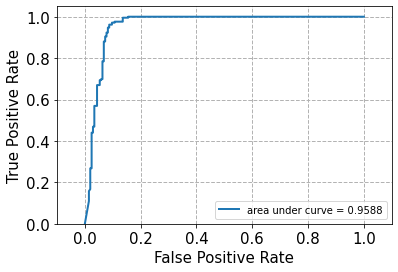

In [50]:
fit_predict_and_plot_roc(pipeline_gnb, train['full_text'], train['target'], test['full_text'], test['target'])

In [51]:
pred_gnb = pipeline_gnb.predict(test['full_text'])

accuracy: 0.927710843373494
recall: 0.937799043062201
precision: 0.92018779342723
f1_score: 0.9289099526066351


Confusion matrix : 
 [[196  13]
 [ 17 189]]
Outcome values : 
 196 13 17 189
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.94      0.93       209
           0       0.94      0.92      0.93       206

    accuracy                           0.93       415
   macro avg       0.93      0.93      0.93       415
weighted avg       0.93      0.93      0.93       415



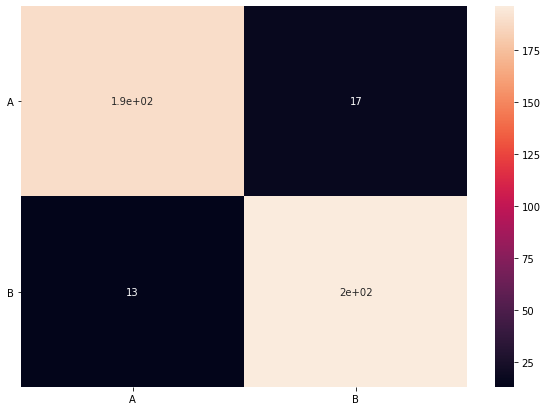

In [52]:
plot_confusion_matrix_(test['target'], pred_gnb)

7: ROC curve, confusion matrix and 4 values are printed above.

# Question 8

In [53]:
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory
from nltk.stem import PorterStemmer

# cachedir = mkdtemp()
# memory = Memory(location=cachedir, verbose=10)

def with_lemmatization(doc):
    sent = lemmatize_sent(doc) 
    sent = [i for i in sent if i not in punctuation] 
    sent = [i for i in sent if not i.isdigit()] 
    return sent

ps = nltk.stem.PorterStemmer()
def with_stemming(doc):
    sent = ps.stem(doc)
    sent = [i for i in sent if i not in punctuation] 
    sent = [i for i in sent if not i.isdigit()] 
    return sent

def without_lemmatization(doc):
    sent = nltk.word_tokenize(doc)
    sent = [i for i in sent if i not in punctuation] 
    sent = [i for i in sent if not i.isdigit()] 
    return sent

def create_targetlabel(train, test):
    
    train["root_label"] = train["root_label"].astype('category')
    train["target"] = train["root_label"].cat.codes
    train["root_label"] = train["root_label"].astype('object')

    test["root_label"] = test["root_label"].astype('category')
    test["target"] = test["root_label"].cat.codes
    test["root_label"] = test["root_label"].astype('object')

data_withcleaning = data.copy()
data_withcleaning['full_text'] = data_withcleaning['full_text'].map(lambda text: clean(text))
train_withcleaning, test_withcleaning = train_test_split(data_withcleaning[["full_text","root_label"]], test_size = 0.2, random_state = 42)
train_withoutcleaning, test_withoutcleaning = train_test_split(data[["full_text","root_label"]], test_size = 0.2, random_state = 42)
create_targetlabel(train_withcleaning, test_withcleaning)
create_targetlabel(train_withoutcleaning, test_withoutcleaning)

print("cleaning train shape:", train_withcleaning.shape)
print("cleaning test shape:", test_withcleaning.shape)
print("without cleaning train shape:", train_withoutcleaning.shape)
print("without cleaning test shape:", test_withoutcleaning.shape)

# pipeline = Pipeline([('vect',TfidfVectorizer(stop_words='english')),
#                      ('tfidf', TfidfTransformer()),
#                      ('reduce_dim',None),
#                      ('clf',None)], memory=memory)

# param_grid = {
#     'vect__min_df': (3,5),
#     'vect__analyzer': (with_lemmatization, with_stemming, without_lemmatization),
#     'reduce_dim':(TruncatedSVD(n_components=5,random_state=42), svd_50, svd_500, NMF(n_components=5,init='random', random_state=42), NMF(n_components=50, init='random', random_state=42), NMF(n_components=500,init='random', random_state=42)),
#     'clf':(SVM_best_Gamma, clf_best_L1, clf_best_L2, GaussianNB())
#     } 

# grid1 = GridSearchCV(pipeline,cv=5,param_grid=param_grid,scoring='accuracy')
# grid2 = GridSearchCV(pipeline,cv=5,param_grid=param_grid,scoring='accuracy')

# grid1.fit(train_withcleaning['full_text'], train_withcleaning['target'])
# print("Best score for pipeline with headers and footers: ", grid.best_score_)
# print("Best params for pipeline with headers and footers: ", grid.best_params_)
# print("Best estimator for pipeline with headers and footers: ", grid.best_estimator_)

# grid2.fit(train_withoutcleaning['full_text'], train_withoutcleaning['target'])
# print("Best score for pipeline without headers and footers: ", grid.best_score_)
# print("Best params for pipeline without headers and footers: ", grid.best_params_)
# print("Best estimator for pipeline without headers and footers: ", grid.best_estimator_)

# rmtree(cachedir)

cleaning train shape: (1657, 3)
cleaning test shape: (415, 3)
without cleaning train shape: (1657, 3)
without cleaning test shape: (415, 3)


In [54]:
# grid_Q8 = pd.concat([grid1, grid2], ignore_index=True, axis=0)
# your_result = pd.DataFrame(grid_Q8.cv_results_)
# grid_sorted = your_result.sort_values(by = 'rank_test_score')
# pd.options.display.max_columns = None
# pd.options.display.width=None
# grid_top5 = grid_sorted.head(5)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(grid_top5)

Best 1~5

In [55]:
def top5(rank, min_df,analyzer_func, reduce_dim_func, clf_func):
    cachedir = mkdtemp()
    memory = Memory(location=cachedir, verbose=False)

    pipeline_Best = Pipeline([('vect',TfidfVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('reduce_dim',None),
                     ('clf',None)], memory=memory)


    param_grid_Best = {
        'vect__min_df': [min_df],
        'vect__analyzer': [analyzer_func],
        'reduce_dim': [reduce_dim_func],
        'clf': [clf_func]} 

    grid_Best = GridSearchCV(pipeline_Best,cv=5,param_grid=param_grid_Best,scoring='accuracy')
    pred_Best = grid_Best.fit(train_withcleaning['full_text'], train_withcleaning['target']).predict(test_withcleaning['full_text'])
    fit_predict_and_plot_roc(grid_Best, train_withcleaning['full_text'], train_withcleaning['target'], test_withcleaning['full_text'], test_withcleaning['target'])

    print("Best {} model:".format(rank))
    print('min_df: {}\nanalyzer_func: {}\nreduce_dim_func: {}\nclf_func: {}'.format(min_df,analyzer_func, reduce_dim_func, clf_func))
    print('accuracy:', accuracy_score(test_withcleaning['target'], pred_Best))
    print('recall:', recall_score(test_withcleaning['target'], pred_Best,average='macro'))
    print('precision:', precision_score(test_withcleaning['target'], pred_Best,average='macro'))
    print('f1_score:', f1_score(test_withcleaning['target'], pred_Best,average='macro'))
    print('\n')

    rmtree(cachedir)

Best 1 model:
min_df: 5
analyzer_func: <function without_lemmatization at 0x000002BD3BE02310>
reduce_dim_func: TruncatedSVD(n_components=500, random_state=42)
clf_func: LogisticRegression(C=75, penalty='l1', random_state=42, solver='liblinear')
accuracy: 0.9734939759036144
recall: 0.9733706508106099
precision: 0.9741415410385259
f1_score: 0.9734785766158316


Best 2 model:
min_df: 3
analyzer_func: <function without_lemmatization at 0x000002BD3BE02310>
reduce_dim_func: TruncatedSVD(n_components=500, random_state=42)
clf_func: LogisticRegression(C=75, penalty='l1', random_state=42, solver='liblinear')
accuracy: 0.9710843373493976
recall: 0.9709783063130023
precision: 0.9715697674418604
f1_score: 0.9710707314806208


Best 3 model:
min_df: 5
analyzer_func: <function without_lemmatization at 0x000002BD3BE02310>
reduce_dim_func: TruncatedSVD(n_components=500, random_state=42)
clf_func: LogisticRegression(C=1000, random_state=42, solver='liblinear')
accuracy: 0.9759036144578314
recall: 0.9757

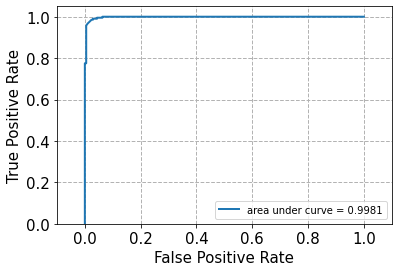

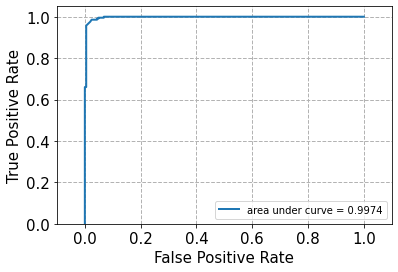

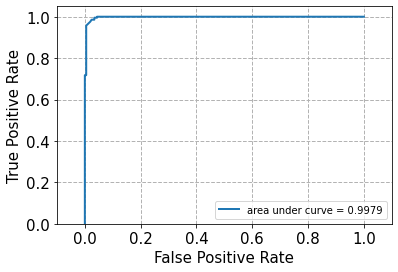

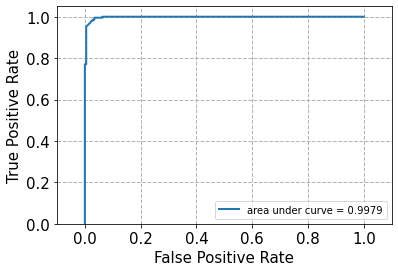

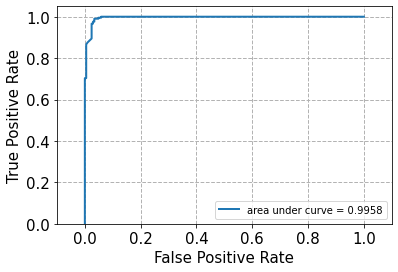

In [56]:
top5(1, 5, without_lemmatization, TruncatedSVD(n_components=500, random_state=42), LogisticRegression(C=75, penalty='l1', random_state=42, solver='liblinear'))
top5(2, 3, without_lemmatization, TruncatedSVD(n_components=500, random_state=42), LogisticRegression(C=75, penalty='l1', random_state=42, solver='liblinear'))
top5(3, 5, without_lemmatization, TruncatedSVD(n_components=500, random_state=42), LogisticRegression(C=1000, random_state=42, solver='liblinear'))
top5(4, 3, without_lemmatization, TruncatedSVD(n_components=500, random_state=42), LogisticRegression(C=1000, random_state=42, solver='liblinear'))
top5(5, 3, without_lemmatization, TruncatedSVD(n_components=500, random_state=42), SVC(C=500, kernel='linear', random_state=42))

I only counted best 5 cleaned data, since it is more reasonable in a real life task, evern though there are unlceaned data in the overall top 5. The detailed process of the codes are included in Q8_completed file.